# Spain Wildfires

- Incendios forestales ocurridos en España entre los años 1968 y 2016.
- Estudio realizado sobre un dataset formado por 585400 observaciones y 51 atributos que se describen a continuación.

------------------------------------------------------------------------------------------------------------------------

**1. Data Cleaning and Preprocessing**

A. Data collection from Kaggle API:

***Note: To run all the code from the beginning first REMOVE the file 'incendios.csv' from src folder.**

In [180]:
import os
import subprocess
from shutil import copy2
#from kaggle.api.kaggle_api_extended import KaggleApi

# Step 1: Move (copy) the kaggle.json file to the correct location
src_path = '/workspaces/Machine-Learning-Final-Project.FGM/.devcontainer/kaggle.json'
dst_path = os.path.expanduser('~/.kaggle/kaggle.json')

# Ensure the .kaggle directory exists and copy the kaggle.json file
os.makedirs(os.path.dirname(dst_path), exist_ok=True)
copy2(src_path, dst_path)

# Set permissions for the kaggle.json file
os.chmod(dst_path, 0o600)

# Step 2: Download the dataset again using Kaggle API
#api = KaggleApi()
##api.authenticate()

# Define dataset info
dataset_name = 'patrilc/wildfirespain'
zip_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip'
output_dir = './'

# Download dataset
#api.dataset_download_files(dataset_name, path=output_dir, unzip=False)

# Step 3: Check if the zip file exists and extract it
if os.path.exists(zip_file_path):
    subprocess.run(['unzip', zip_file_path, '-d', output_dir], check=True)
    print(f"{zip_file_path} successfully extracted to {output_dir}")
else:
    print(f"{zip_file_path} does not exist in the specified path.")

# Step 4: List the contents of the current directory
directory_contents = os.listdir(output_dir)
print("Directory contents after extraction:")
for item in directory_contents:
    print(item)

Archive:  /workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip
  inflating: ./incendios.csv         
/workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip successfully extracted to ./
Directory contents after extraction:
workflow.csv
app.py
wildfirespain.zip
estructura_incendios_con_dtypes.xlsx
utils.py
explore.ipynb
incendios.csv


In [181]:
import pandas as pd

file_path = "/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv"

incendios = pd.read_csv(file_path, delimiter=';')

pd.set_option('display.max_columns', None)

incendios


/tmp/ipykernel_1726/1022687328.py:5: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  incendios = pd.read_csv(file_path, delimiter=';')


,idpif,anio,idestadopif,probabilidadignicion,idpeligro,idcomunidad,comunidad,idprovincia,provincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,puntosinicioincendio,deteccion,extinguido,horadeteccion,mesdeteccion,duracion,primeranotificaciondesde112,iddetectadopor,idgradoresponsabilidad,idcausa,idmotivacion,diastormenta,idinvestigacioncausa,idcertidumbrecausa,intencionalidad,idcausante,idautorizacionactividad,idclasedia,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,direccionviento,perdidassuperficiales,idnivelgravedadmaximo,numeromediospersonal,numeromediospesados,numeromediosaereos,huso,x,y,iddatum,claseincendio,lugar,combustible,tipodefuego,tipodeataque
0,568679.0000,2016,3,NaN,NaN,15,Islas Baleares,7,Islas Baleares,63,39.7090,2.6220,409.0000,1,1.0000,10/01/2016,10/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0000,290,NaN,0.0000,1.0000,2,supuesto_no_intencionado,2,4.0000,festivo,0.0000,17.0000,49.0000,20.0000,Suroeste,0.2000,0.0000,20,18,0,31.0000,466451.0000,4397989.0000,2.0000,conato,excursionistas,bosques,superficie,directo
1,568680.0000,2016,3,NaN,NaN,10,Aragon,22,Huesca,157,42.4660,0.6950,1213.0000,1,1.0000,12/01/2016,12/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,1.0000,322,NaN,0.0000,3.0000,1,no_intencionado,1,3.0000,laborable,2.0000,8.0000,0.0000,0.0000,Norte,0.0500,0.0000,4,0,0,30.0000,800159.0000,4713460.0000,2.0000,conato,vertederos,pas_mat,superficie,directo
2,568681.0000,2016,3,NaN,NaN,10,Aragon,22,Huesca,125,42.1410,-0.4080,483.0000,1,1.0000,17/01/2016,17/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0000,241,NaN,0.0000,3.0000,1,no_intencionado,1,4.0000,festivo,3.0000,8.0000,40.0000,4.0000,Noreste,0.2300,0.0000,9,4,0,30.0000,714747.0000,4675882.0000,2.0000,conato,NaN,pastizal,superficie,directo
3,568682.0000,2016,3,NaN,NaN,10,Aragon,22,Huesca,52,41.6890,0.1780,196.0000,1,1.0000,17/01/2016,17/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0000,212,NaN,0.0000,3.0000,2,supuesto_no_intencionado,2,4.0000,festivo,0.0000,0.0000,0.0000,0.0000,Norte,0.6500,0.0000,8,4,0,NaN,NaN,NaN,NaN,conato,viasferreas,pas_mat,superficie,directo
4,568683.0000,2016,3,NaN,NaN,10,Aragon,22,Huesca,197,41.8660,-0.4610,399.0000,1,1.0000,22/01/2016,22/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0000,212,NaN,0.0000,3.0000,1,no_intencionado,2,4.0000,laborable,0.0000,0.0000,0.0000,0.0000,Norte,0.1500,0.0000,7,3,0,NaN,NaN,NaN,NaN,conato,viasferreas,pas_mat,superficie,directo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585394,1240141.0000,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,249,39.7290,-2.9280,775.0000,1,1.0000,06/10/2016,06/10/2016,tarde,octubre,0,VERDADERO,vigilante_fijo,1.0000,210,NaN,0.0000,3.0000,2,supuesto_no_intencionado,2,3.0000,laborable,0.0000,0.0000,0.0000,0.0000,Norte,7.9500,0.0000,1,0,0,NaN,NaN,NaN,NaN,incendio,viasferreas,pastizal,superficie,directo
585395,1240142.0000,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,128,39.5690,-2.7620,735.0000,1,1.0000,03/10/2016,04/10/2016,noche,octubre,1,VERDADERO,vigilante_fijo,3.0000,400,401.0000,0.0000,3.0000,2,supuesto_intencionado,2,4.0000,laborable,0.0000,0.0000,0.0000,0.0000,Norte,1.5800,0.0000,3,2,0,NaN,NaN,NaN,NaN,incendio,otros,pas_res,superficie,directo
585396,1240144.0000,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,102,39.6120,-2.2810,815.0000,1,1.0000,03/10/2016,04/10/2016,tarde,octubre,1,VERDADERO,vigilante_fijo,1.0000,210,NaN,0.0000,3.0000,2,supuesto_no_intencionado,2,3.0000,laborable,0.0000,0.0000,0.0000,0.0000,Norte,4.1000,0.0000,3,2,0,NaN,NaN,NaN,NaN,incendio,otros,mat_res,superficie,directo
585397,1240145.0000,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,153,39.4850,-2.7450,716.0000,1,1.0000,03/10/2016,03/10/2016,tarde,octubre,0,FALSO,base_cdf,3.0000,400,401.0000,0.0000,3.0000,2,supuesto_intencionado,2,4.0000,laborable,0.0000,0.0000,0.0000,0.0000,Norte,0.8600,0.

In [182]:
# Get basic info about the dataset
incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585399 entries, 0 to 585398
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   idpif                        585399 non-null  float64
 1   anio                         585399 non-null  int64  
 2   idestadopif                  585399 non-null  int64  
 3   probabilidadignicion         489389 non-null  float64
 4   idpeligro                    579862 non-null  float64
 5   idcomunidad                  585399 non-null  int64  
 6   comunidad                    585399 non-null  object 
 7   idprovincia                  585399 non-null  int64  
 8   provincia                    585399 non-null  object 
 9   idmunicipio                  585399 non-null  int64  
 10  latitud                      514051 non-null  float64
 11  longitud                     514051 non-null  float64
 12  altitud                      514051 non-null  float64
 13 

In [183]:
# Summary statistics
incendios.describe()

,idpif,anio,idestadopif,probabilidadignicion,idpeligro,idcomunidad,idprovincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,puntosinicioincendio,duracion,idgradoresponsabilidad,idcausa,idmotivacion,diastormenta,idinvestigacioncausa,idcertidumbrecausa,idcausante,idautorizacionactividad,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,perdidassuperficiales,idnivelgravedadmaximo,numeromediospersonal,numeromediospesados,numeromediosaereos,huso,x,y,iddatum
count,585399.0000,585399.0000,585399.0000,489389.0000,579862.0000,585399.0000,585399.0000,585399.0000,514051.0000,514051.0000,514051.0000,585399.0000,6414.0000,585399.0000,6414.0000,585399.0000,302248.0000,9262.0000,6414.0000,585399.0000,585399.0000,6414.0000,206416.0000,282064.0000,277034.0000,262184.0000,585399.0000,6417.0000,585399.0000,585399.0000,585399.0000,220590.0000,220547.0000,220585.0000,3926.0000
mean,865973.7657,1997.3247,3.9850,15.0441,1.5038,6.7911,27.0642,65.6980,41.5852,-5.7463,447.3244,1.0073,1.1483,0.1965,2.7797,384.0693,409.1327,0.4366,1.6049,1.7704,1.8864,3.4386,14.6093,22.3102,52.9320,14.9515,12.7679,0.0231,27.7646,6.5028,1.8135,29.4746,516555.3444,4609157.5847,2.0285
std,169396.6982,10.8838,0.1218,23.0299,0.8733,5.2751,11.8410,92.2137,1.9912,3.0203,321.7105,0.1263,1.2347,0.7569,1.0063,103.1587,25.0773,2.6430,0.9187,0.4206,0.3173,0.7956,20.1326,10.6798,20.1745,14.3845,155.3108,0.1733,243.4401,41.3808,13.8211,0.6318,145316.3779,240966.7556,0.2903
min,568679.0000,1968.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,27.7560,-17.9980,1.0000,1.0000,1.0000,0.0000,1.0000,100.0000,400.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,-6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,21406.0000,30605.0000,2.0000
25%,719447.5000,1990.0000,4.0000,0.0000,1.0000,3.0000,15.0000,15.0000,40.7200,-8.0160,158.0000,1.0000,1.0000,0.0000,2.0000,400.0000,400.0000,0.0000,1.0000,2.0000,2.0000,3.0000,4.0000,17.0000,39.0000,5.0000,0.1000,0.0000,5.0000,0.0000,0.0000,29.0000,427065.5000,4537110.0000,2.0000
50%,865816.0000,1998.0000,4.0000,0.0000,1.0000,4.0000,32.0000,43.0000,42.2340,-6.5520,431.0000,1.0000,1.0000,0.0000,3.0000,400.0000,400.0000,0.0000,1.0000,2.0000,2.0000,4.0000,9.0000,22.0000,53.0000,10.0000,0.7000,0.0000,9.0000,3.0000,0.0000,29.0000,547648.0000,4673165.0000,2.0000
75%,1012180.5000,2005.0000,4.0000,30.0000,2.0000,11.0000,36.0000,80.0000,42.8660,-4.1820,677.0000,1.0000,1.0000,0.0000,3.0000,400.0000,402.0000,0.0000,3.0000,2.0000,2.0000,4.0000,18.0000,28.0000,68.0000,20.0000,3.0000,0.0000,18.0000,5.0000,0.0000,30.0000,616963.0000,4733550.0000,2.0000
max,1240186.0000,2016.0000,4.0000,100.0000,4.0000,18.0000,51.0000,999.0000,43.7400,4.2900,1695.0000,21.0000,84.0000,153.0000,5.0000,600.0000,499.0000,85.0000,3.0000,2.0000,2.0000,4.0000,1430.0000,2132.0000,254.0000,250.0000,28879.1000,2.0000,82320.0000,8520.0000,3264.0000,71.0000,6557209.0000,46648500.0000,5.0000


In [184]:
def column_summary(incendios):
    summary_data = []
    
    for col_name in incendios.columns:
        col_dtype = incendios[col_name].dtype
        num_of_nulls = incendios[col_name].isnull().sum()
        num_of_non_nulls = incendios[col_name].notnull().sum()
        num_of_distinct_values = incendios[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = incendios[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = incendios[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_incendios = pd.DataFrame(summary_data)
    return summary_incendios


summary_incendios = column_summary(incendios)
display(summary_incendios)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,idpif,float64,0,585399,585399,"{1240186.0: 1, 568679.0: 1, 568680.0: 1, 56868..."
1,anio,int64,0,585399,49,"{1995: 25557, 2005: 25492, 2000: 23574, 1997: ..."
2,idestadopif,int64,0,585399,4,"{4: 576631, 3: 8752, 2: 15, 1: 1}"
3,probabilidadignicion,float64,96010,489389,99,"{0.0: 309071, 30.0: 38130, 40.0: 37194, 20.0: ..."
4,idpeligro,float64,5537,579862,5,"{1.0: 331401, 2.0: 112872, 3.0: 96233, 0.0: 32..."
5,idcomunidad,int64,0,585399,18,"{3: 253477, 17: 71775, 5: 46937, 4: 40210, 14:..."
6,comunidad,object,0,585399,18,"{'Galicia': 253477, 'Castilla y Leon': 71775, ..."
7,idprovincia,int64,0,585399,51,"{36: 79222, 32: 77598, 15: 59234, 33: 46937, 2..."
8,provincia,object,0,585399,51,"{'Pontevedra': 79222, 'Ourense': 77598, 'A Cor..."
9,idmunicipio,int64,0,585399,478,"{0: 67038, 34: 8966, 11: 8276, 50: 7889, 9: 76..."


In [185]:
import pandas as pd

# Check for missing values in the incendios dataframe
missing_values = incendios.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios.shape

                             Missing Values  Percentage Missing
idpif                                     0              0.0000
anio                                      0              0.0000
idestadopif                               0              0.0000
probabilidadignicion                  96010             16.4008
idpeligro                              5537              0.9459
idcomunidad                               0              0.0000
comunidad                                 0              0.0000
idprovincia                               0              0.0000
provincia                                 0              0.0000
idmunicipio                               0              0.0000
latitud                               71348             12.1879
longitud                              71348             12.1879
altitud                               71348             12.1879
nummunicipiosafectados                    0              0.0000
puntosinicioincendio                 578

(585399, 51)

In [186]:
print(incendios.probabilidadignicion.value_counts())

probabilidadignicion
0.0000     309071
30.0000     38130
40.0000     37194
20.0000     26701
50.0000     24719
            ...  
91.0000         1
93.0000         1
84.0000         1
94.0000         1
92.0000         1
Name: count, Length: 99, dtype: int64


- He sacado 'idmunicipio' de la lista de variables a eliminar para poder agrupar las dependientes de la localización alrededor de esta en los siguientes pasos.
En el siguiente código sólo ha cambiado la presencia de 'idmunicipio' (considerando sacar tambiém 'iddetectadopor' debido a que no tiene missing data):

In [187]:
# Identify columns to drop due to high percentage of missing values
columns_to_drop = ['puntosinicioincendio', 'idgradoresponsabilidad', 'diastormenta', 
                   'idinvestigacioncausa', 'idautorizacionactividad', 'idnivelgravedadmaximo', 
                   'huso', 'x', 'y', 'iddatum', 'idpif', 'idestadopif', 'idpeligro', 'idcomunidad', 'idcausa', 'idmotivacion',
                   'idcertidumbrecausa', 'idcausante', 'idclasedia']

# Drop the specified columns
incendios = incendios.drop(columns=columns_to_drop, errors='ignore')

# Save the cleaned dataset back to the same file path
file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios.to_csv(file_path, index=False)

# Print a confirmation message
print("Columns with high missing values removed successfully.")

incendios.shape

Columns with high missing values removed successfully.


(585399, 32)

In [188]:
import pandas as pd

# Load the original dataset
file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios = pd.read_csv(file_path)

# Columns to check for non-missing values
required_columns = ['direccionviento', 'velocidadviento', 'humrelativa', 'tempmaxima', 'diasultimalluvia']

# Filter the dataset to retain only rows with non-missing values in the specified columns
incendios_cleaned = incendios.dropna(subset=required_columns)

# Print confirmation and shape of the filtered dataset
print(f"Original dataset shape: {incendios.shape}")
print(f"Filtered dataset shape: {incendios_cleaned.shape}")
print("Rows with missing values in the specified columns have been removed successfully.")

# Save the filtered dataset back to a file if needed
filtered_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios_cleaned.to_csv(filtered_file_path, index=False)
print(f"Filtered dataset saved to: {filtered_file_path}")

/tmp/ipykernel_1726/3061771837.py:5: DtypeWarning: Columns (22,29) have mixed types. Specify dtype option on import or set low_memory=False.
  incendios = pd.read_csv(file_path)


Original dataset shape: (585399, 32)
Filtered dataset shape: (131359, 32)
Rows with missing values in the specified columns have been removed successfully.
Filtered dataset saved to: /workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv


In [189]:
import pandas as pd

# Check for missing values in the incendios dataframe
missing_values = incendios_cleaned.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_cleaned)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_cleaned.shape

                             Missing Values  Percentage Missing
anio                                      0              0.0000
probabilidadignicion                  15253             11.6117
comunidad                                 0              0.0000
idprovincia                               0              0.0000
provincia                                 0              0.0000
idmunicipio                               0              0.0000
latitud                                 526              0.4004
longitud                                526              0.4004
altitud                                 526              0.4004
nummunicipiosafectados                    0              0.0000
deteccion                                 0              0.0000
extinguido                                0              0.0000
horadeteccion                             0              0.0000
mesdeteccion                              0              0.0000
duracion                                

(131359, 32)

- VOy a hacer una prueba y eliminar las filas con missing data, a ver cómo queda el dataset:

In [190]:
# Drop missing values from the specified columns
columns_to_drop_na = ['probabilidadignicion', 'latitud', 'longitud', 'altitud', 
                      'lugar', 'combustible', 'tipodefuego', 'tipodeataque']

incendios_cleaned = incendios_cleaned.dropna(subset=columns_to_drop_na)

# Define the path to save the cleaned dataset
cleaned_file_path = "/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv"

# Save the cleaned dataset as a CSV file
incendios_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully at: {cleaned_file_path}")

incendios_cleaned.shape

Cleaned dataset saved successfully at: /workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv


(94974, 32)

In [191]:
# Check for missing values in the incendios dataframe
missing_values = incendios_cleaned.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_cleaned)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_cleaned.shape

                             Missing Values  Percentage Missing
anio                                      0              0.0000
probabilidadignicion                      0              0.0000
comunidad                                 0              0.0000
idprovincia                               0              0.0000
provincia                                 0              0.0000
idmunicipio                               0              0.0000
latitud                                   0              0.0000
longitud                                  0              0.0000
altitud                                   0              0.0000
nummunicipiosafectados                    0              0.0000
deteccion                                 0              0.0000
extinguido                                0              0.0000
horadeteccion                             0              0.0000
mesdeteccion                              0              0.0000
duracion                                

(94974, 32)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

En vez de deshacerme de las filas de las variables con bajo % de missing imput the median!!

In [192]:
import pandas as pd

# Load the original dataset
#file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
#incendios = pd.read_csv(file_path)

# Impute missing values for numerical variables with the median
#numerical_columns = ['latitud', 'longitud', 'altitud', 'diasultimalluvia', 'tempmaxima', 'velocidadviento']
#for col in numerical_columns:
#    median_value = incendios_cleaned[col].median()
#    incendios_cleaned[col] = incendios_cleaned[col].fillna(median_value)

# Impute missing values for categorical variables with the mode
#categorical_columns = ['probabilidadignicion', 'humrelativa', 'direccionviento', 'tipodeataque', 'lugar', 'combustible', 'tipodefuego']
#for col in categorical_columns:
#    mode_value = incendios_cleaned[col].mode()[0]
#    incendios_cleaned[col] = incendios_cleaned[col].fillna(mode_value)

# Save the cleaned dataset
#cleaned_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv'
#incendios_cleaned.to_csv(cleaned_file_path, index=False)

#print("Data cleaning completed successfully!")
#print(f"Cleaned dataset saved to: {cleaned_file_path}")

---------------------------------------------------------------------------------------------------------------------------------------------

In [193]:
import pandas as pd

# Check for missing values in the incendios_cleaned dataframe
missing_values = incendios_cleaned.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_cleaned)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_cleaned.shape

                             Missing Values  Percentage Missing
anio                                      0              0.0000
probabilidadignicion                      0              0.0000
comunidad                                 0              0.0000
idprovincia                               0              0.0000
provincia                                 0              0.0000
idmunicipio                               0              0.0000
latitud                                   0              0.0000
longitud                                  0              0.0000
altitud                                   0              0.0000
nummunicipiosafectados                    0              0.0000
deteccion                                 0              0.0000
extinguido                                0              0.0000
horadeteccion                             0              0.0000
mesdeteccion                              0              0.0000
duracion                                

(94974, 32)

**Summary of variables and classification*

- Final Numerical Variables:

'probabilidadignicion', 'latitud', 'longitud', 'altitud', 'diasultimalluvia', 'tempmaxima', 'velocidadviento', 'anio', 'duracion', 'humrelativa', 'perdidassuperficiales', 'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos', 'nummunicipiosafectados'.

- Final Categorical Variables:

'idmotivacion', 'direccionviento', 'tipodeataque', 'idestadopif', 'idpeligro', 'idcomunidad', 'comunidad', 'idprovincia', 'provincia', 'idmunicipio', 'deteccion', 'extinguido', 'horadeteccion', 'mesdeteccion', 'primeranotificaciondesde112', 'iddetectadopor', 'idcausa', 'idcertidumbrecausa', 'intencionalidad', 'idcausante', 'idclasedia', 'claseincendio', 'lugar', 'combustible', 'tipodefuego', 'iddetectadopor', 'idmunicipio'.

**Suggestions for Analysis**

- Retain for Analysis (Duration Prediction)

Numerical: 'probabilidadignicion', 'tempmaxima', 'humrelativa', 'velocidadviento', 'perdidassuperficiales', 'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos'.

Categorical: 'idpeligro', 'idcomunidad', 'idprovincia', 'horadeteccion', 'direccionviento', 'claseincendio', 'tipodeataque', 'combustible', 'tipodefuego', 'idcausa', 'idclasedia'.

- Consider Simplifying or leaving on a side (Potentially redundant variables):

Potentially Redundant Variables
Numerical: 'anio', 'latitud', 'longitud', 'altitud', 'diasultimalluvia', 'nummunicipiosafectados'.

Categorical: 'comunidad', 'provincia', 'deteccion', 'extinguido', 'mesdeteccion', 'primeranotificaciondesde112', 'idmotivacion', 'lugar'.

**2. Analysis of univariate variables**

- Analysis of categorical variables

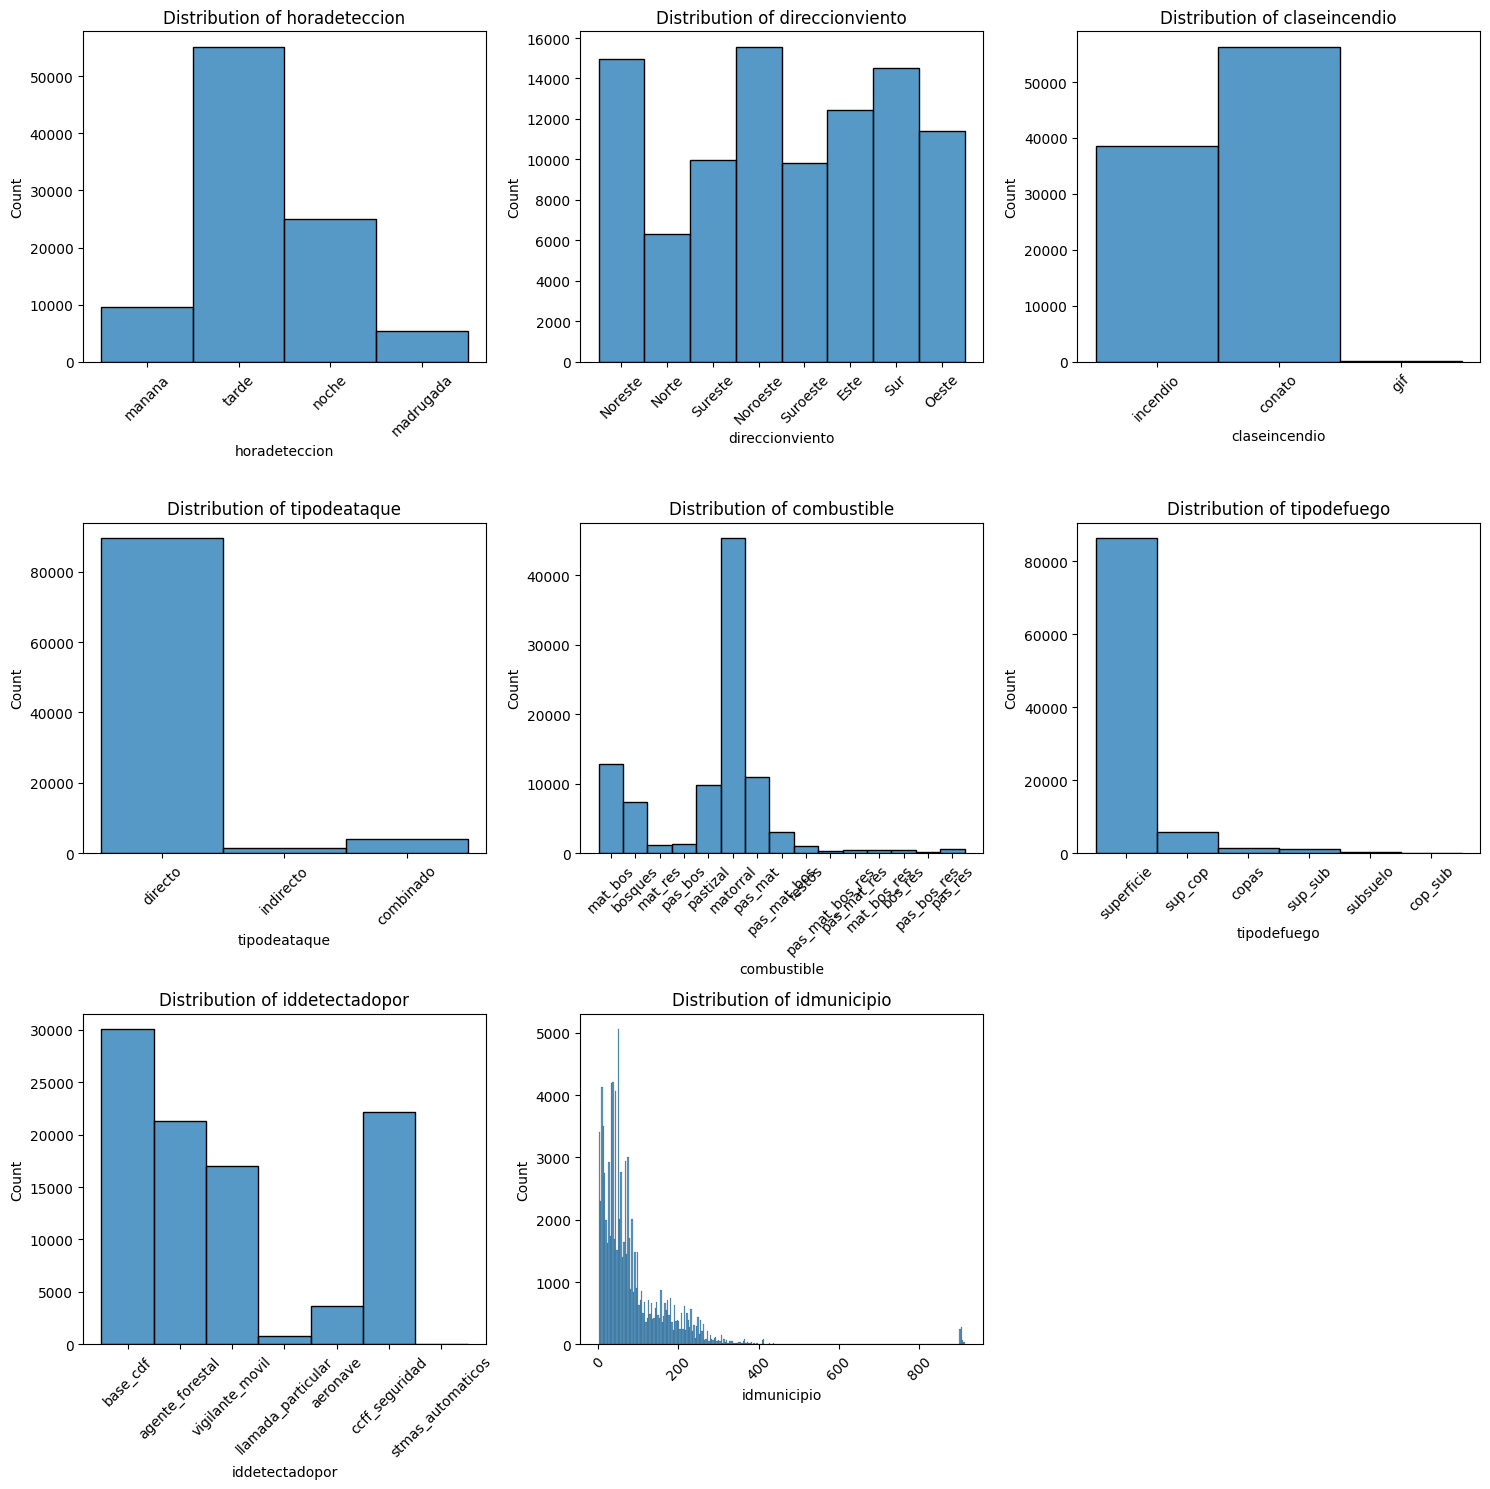

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define categorical variables to analyze (including two new variables)
categorical_vars = ['horadeteccion', 'direccionviento', 'claseincendio', 'tipodeataque', 
                    'combustible', 'tipodefuego', 'iddetectadopor', 'idmunicipio']  

# Dynamically determine rows and columns for subplots
num_vars = len(categorical_vars)
cols = 3  # Fixed number of columns
rows = math.ceil(num_vars / cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through the variables and plot
for i, var in enumerate(categorical_vars):
    sns.histplot(data=incendios_cleaned, x=var, ax=axes[i], kde=False)
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(var)
    axes[i].tick_params(axis='x', rotation=45)  

# Hide unused subplots
for i in range(len(categorical_vars), len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


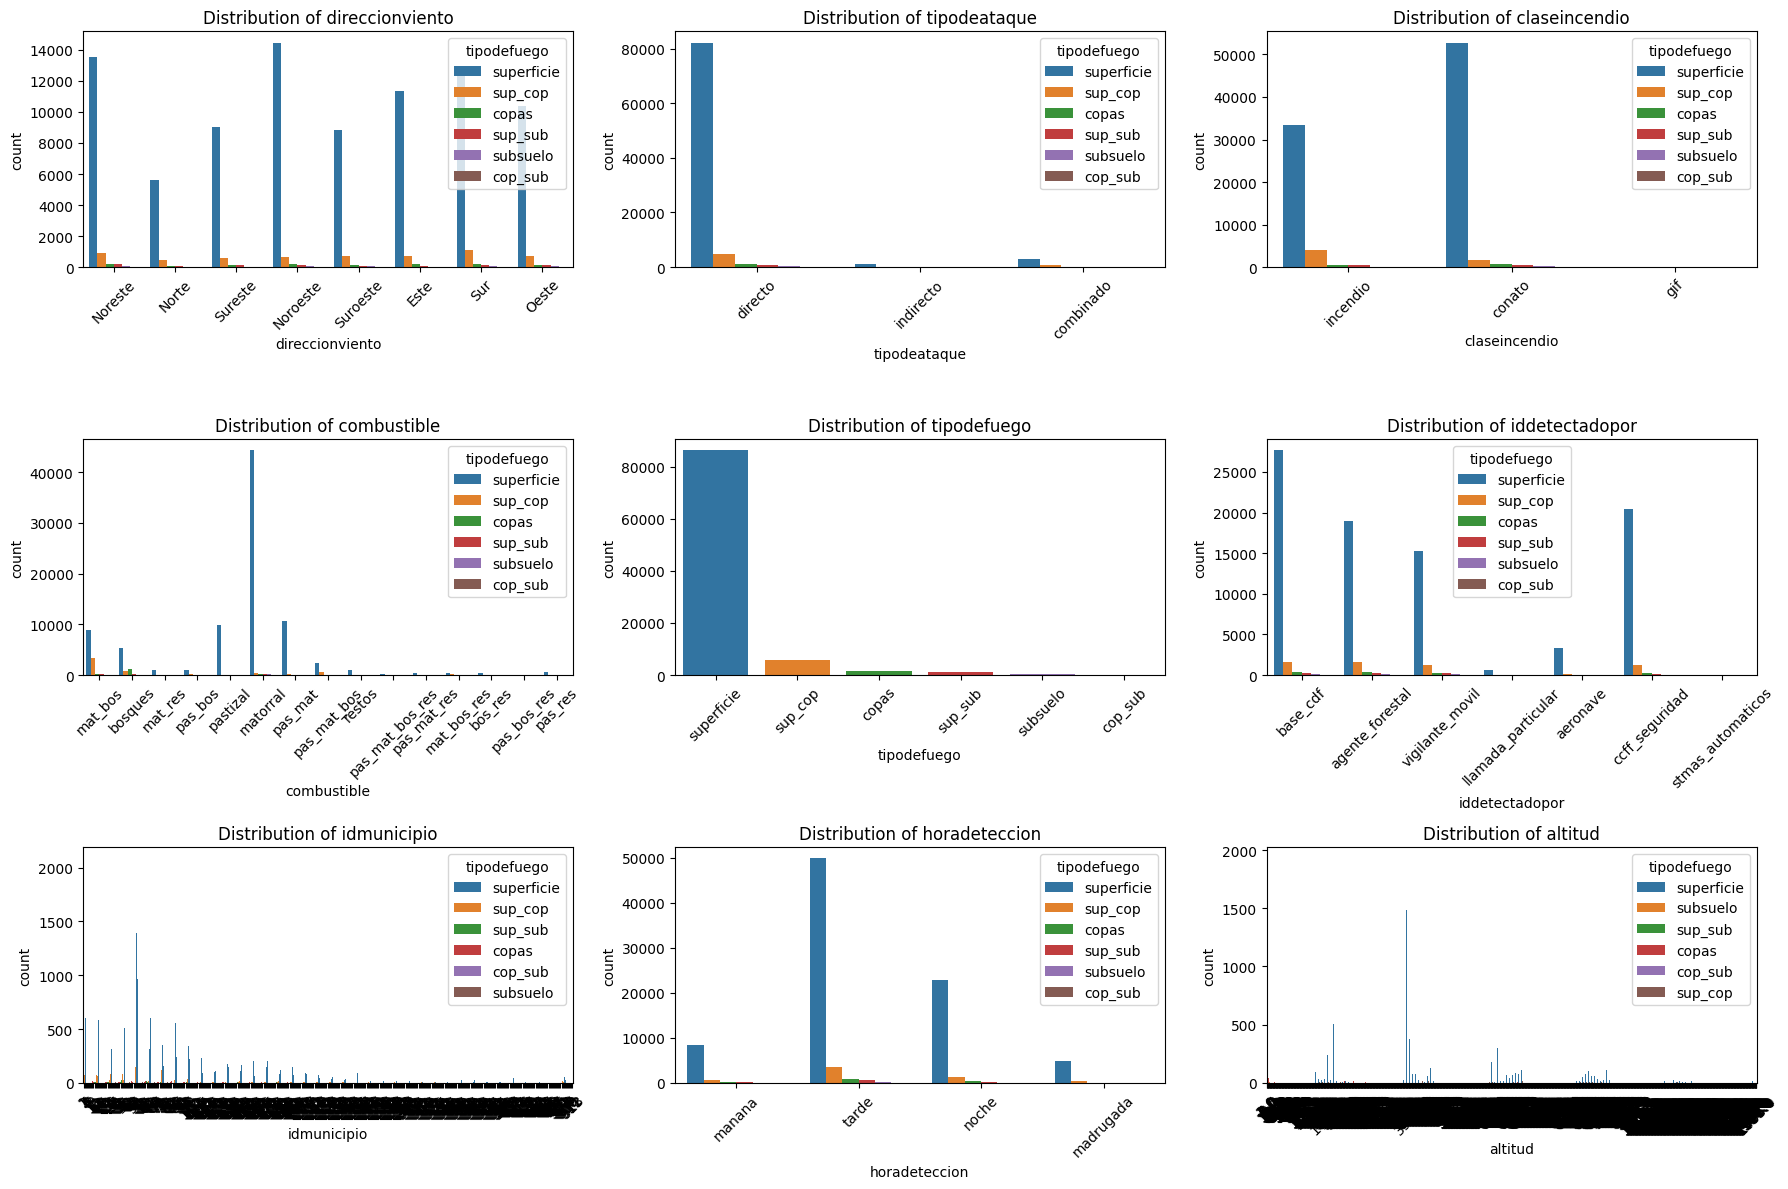

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical variables to plot
categorical_vars = ["direccionviento", "tipodeataque", "claseincendio", 
                    "combustible", "tipodefuego", "iddetectadopor", 
                    "idmunicipio", "horadeteccion", "altitud"]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through variables and plot count plots
for i, var in enumerate(categorical_vars):
    sns.countplot(ax=axes[i], data=incendios_cleaned, x=var, hue="tipodefuego")
    axes[i].set_title(f"Distribution of {var}")
    axes[i].tick_params(axis='x', rotation=45)  # Improve readability

# Hide unused subplots (if any)
for i in range(len(categorical_vars), len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


- Analysis of numerical variables:

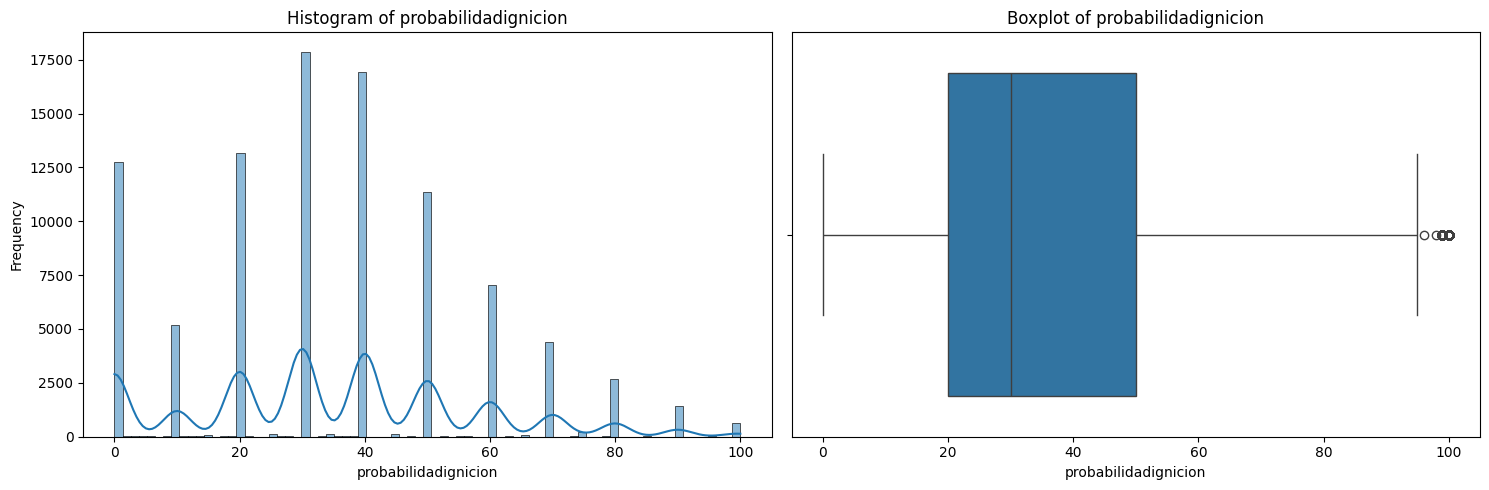

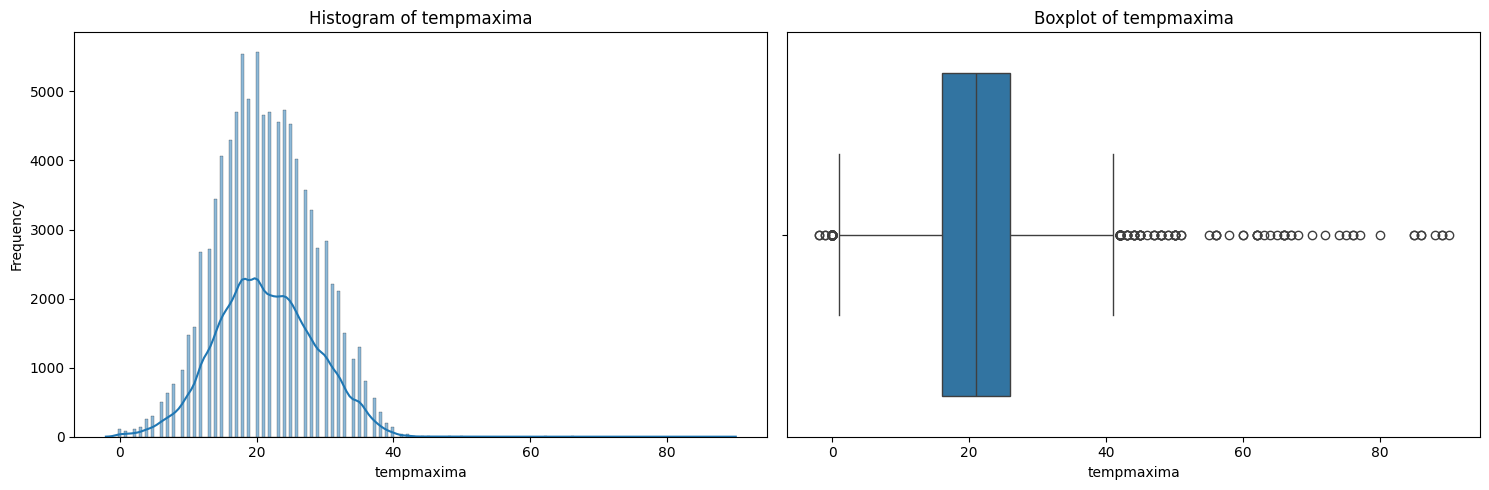

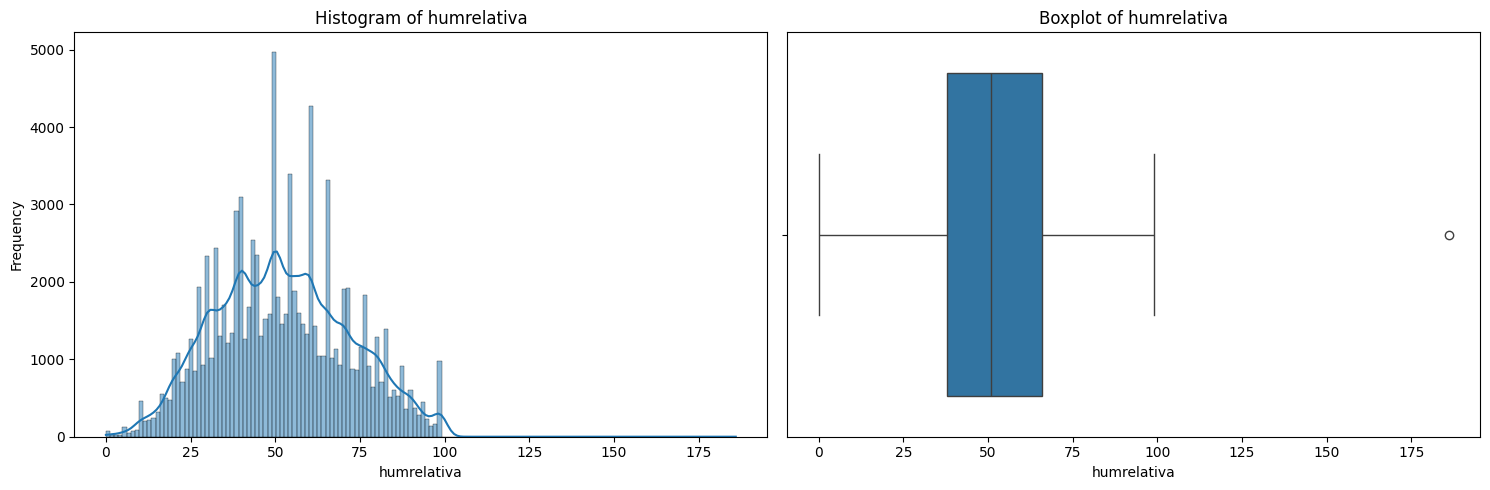

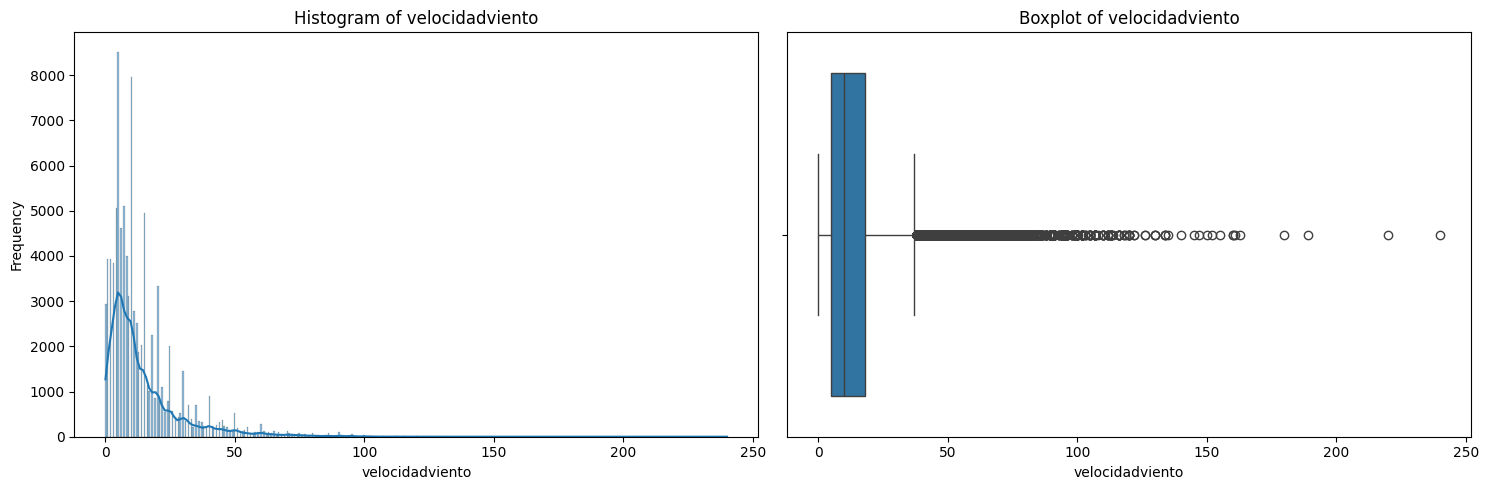

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
variables = ['probabilidadignicion', 'tempmaxima', 'humrelativa', 'velocidadviento']

# Remove rows with missing or problematic values for the selected variables
cleaned_data = incendios_cleaned[variables].dropna()

# Iterate through variables and plot them individually
for var in variables:
    # Create a new figure for each variable
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # Histogram (left plot)
    sns.histplot(ax=axes[0], data=cleaned_data, x=var, kde=True)
    axes[0].set_title(f"Histogram of {var}")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frequency')
    
    # Boxplot (right plot)
    sns.boxplot(ax=axes[1], data=cleaned_data, x=var)
    axes[1].set_title(f"Boxplot of {var}")
    axes[1].set_xlabel(var)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [197]:
incendios_cleaned.shape

(94974, 32)

In [198]:
 #Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para 'perdidassuperficiales'
Q1_per = incendios_cleaned['perdidassuperficiales'].quantile(0.25)
Q3_per= incendios_cleaned['perdidassuperficiales'].quantile(0.75)
IQR_per = Q3_per - Q1_per

# Definir los límites inferior y superior para 'duracion'
lower_limit_perdidas = Q1_per - 1.5 * IQR_per
upper_limit_perdidas = Q3_per + 1.5 * IQR_per

# Imprimir los resultados

In [199]:
# Contar cuántos valores superan el límite superior
outliers_superiores = incendios_cleaned[incendios_cleaned['perdidassuperficiales'] > upper_limit_perdidas]
num_outliers_superiores = len(outliers_superiores)

# Imprimir el resultado
print(f"Límite superior: {upper_limit_perdidas}")
print(f"Número de valores por encima del límite superior: {num_outliers_superiores}")

# (Opcional) Imprimir el porcentaje de valores que son outliers superiores
total_valores = len(incendios_cleaned)
porcentaje_outliers_superiores = (num_outliers_superiores / total_valores) * 100
print(f"Porcentaje de valores por encima del límite superior: {porcentaje_outliers_superiores:.2f}%")

# (Opcional) Mostrar los valores atípicos superiores
print("\nValores atípicos superiores:")
outliers_superiores

Límite superior: 7.35
Número de valores por encima del límite superior: 12481
Porcentaje de valores por encima del límite superior: 13.14%

Valores atípicos superiores:


,anio,probabilidadignicion,comunidad,idprovincia,provincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,deteccion,extinguido,horadeteccion,mesdeteccion,duracion,primeranotificaciondesde112,iddetectadopor,intencionalidad,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,direccionviento,perdidassuperficiales,numeromediospersonal,numeromediospesados,numeromediosaereos,claseincendio,lugar,combustible,tipodefuego,tipodeataque
71837,1983,0.0000,Comunidad Valenciana,12,Castellon,76,39.9390,-0.4680,594.0000,1,25/02/1983,25/02/1983,manana,febrero,0,FALSO,base_cdf,supuesto_no_intencionado,15.0000,14.0000,15.0000,7.0000,Noreste,10.0000,20,0,0,incendio,otros,mat_bos,superficie,directo
113686,1988,0.0000,Castilla La Mancha,16,Cuenca,258,39.8700,-1.6270,990.0000,1,28/09/1988,29/09/1988,manana,septiembre,1,FALSO,agente_forestal,supuesto_intencionado,44.0000,30.0000,38.0000,8.0000,Sureste,121.0000,260,25,0,incendio,otros,mat_res,sup_cop,combinado
121188,1989,0.0000,Castilla y Leon,5,Avila,221,40.2510,-5.0030,724.0000,1,23/08/1989,23/08/1989,tarde,agosto,0,FALSO,agente_forestal,supuesto_intencionado,83.0000,36.0000,30.0000,2.0000,Suroeste,50.0000,335,45,0,incendio,excursionistas,bosques,copas,combinado
122010,1989,0.0000,Castilla y Leon,9,Burgos,217,42.8310,-3.5430,618.0000,1,31/07/1989,31/07/1989,tarde,julio,0,FALSO,vigilante_movil,supuesto_no_intencionado,9.0000,32.0000,63.0000,1.0000,Este,8.0000,42,0,0,incendio,otros,matorral,superficie,directo
122129,1989,10.0000,Castilla y Leon,9,Burgos,905,42.7170,-3.7500,747.0000,1,14/08/1989,14/08/1989,noche,agosto,0,FALSO,agente_forestal,supuesto_no_intencionado,7.0000,33.0000,54.0000,2.0000,Este,20.0000,30,0,0,incendio,lineaselectricas,pastizal,superficie,directo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584507,2016,40.0000,Castilla y Leon,9,Burgos,91,42.2900,-4.1430,808.0000,2,12/09/2016,17/09/2016,tarde,septiembre,5,VERDADERO,ccff_seguridad,supuesto_intencionado,42.0000,30.0000,47.0000,5.0000,Noreste,19.7000,165,15,30,incendio,viasferreas,mat_bos_res,sup_cop,combinado
584517,2016,20.0000,Castilla y Leon,9,Burgos,98,42.4930,-3.1360,704.0000,1,28/10/2016,28/10/2016,tarde,octubre,0,VERDADERO,ccff_seguridad,no_intencionado,0.0000,14.0000,63.0000,3.0000,Suroeste,8.6600,11,2,0,incendio,otros,pas_bos_res,superficie,directo
584538,2016,20.0000,Castilla y Leon,9,Burgos,410,43.1010,-3.2820,311.0000,1,04/05/2016,04/05/2016,tarde,mayo,0,FALSO,base_cdf,intencionado,4.0000,25.0000,78.0000,1.0000,Noreste,13.7400,36,0,4,incendio,lineaselectricas,pas_mat_bos,superficie,directo
584547,2016,60.0000,Castilla y Leon,9,Burgos,32,41.9840,-3.8270,877.0000,1,19/07/2016,19/07/2016,tarde,julio,0,FALSO,vigilante_movil,no_intencionado,12.0000,35.0000,32.0000,37.0000,Suroeste,10.7500,42,5,15,incendio,otros,pas_mat_bos_res,superficie,directo


In [200]:
#Definir los límites inferior y superior
lower_limit = Q1_per - 3 * IQR_per
upper_limit = Q3_per + 3 * IQR_per

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR_per, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.7 y -8.6, con un rango intercuartílico de 2.9


In [201]:
incendios_cleaned = incendios_cleaned[incendios_cleaned["perdidassuperficiales"] <= 11.7]


incendios_cleaned.shape


(86137, 32)

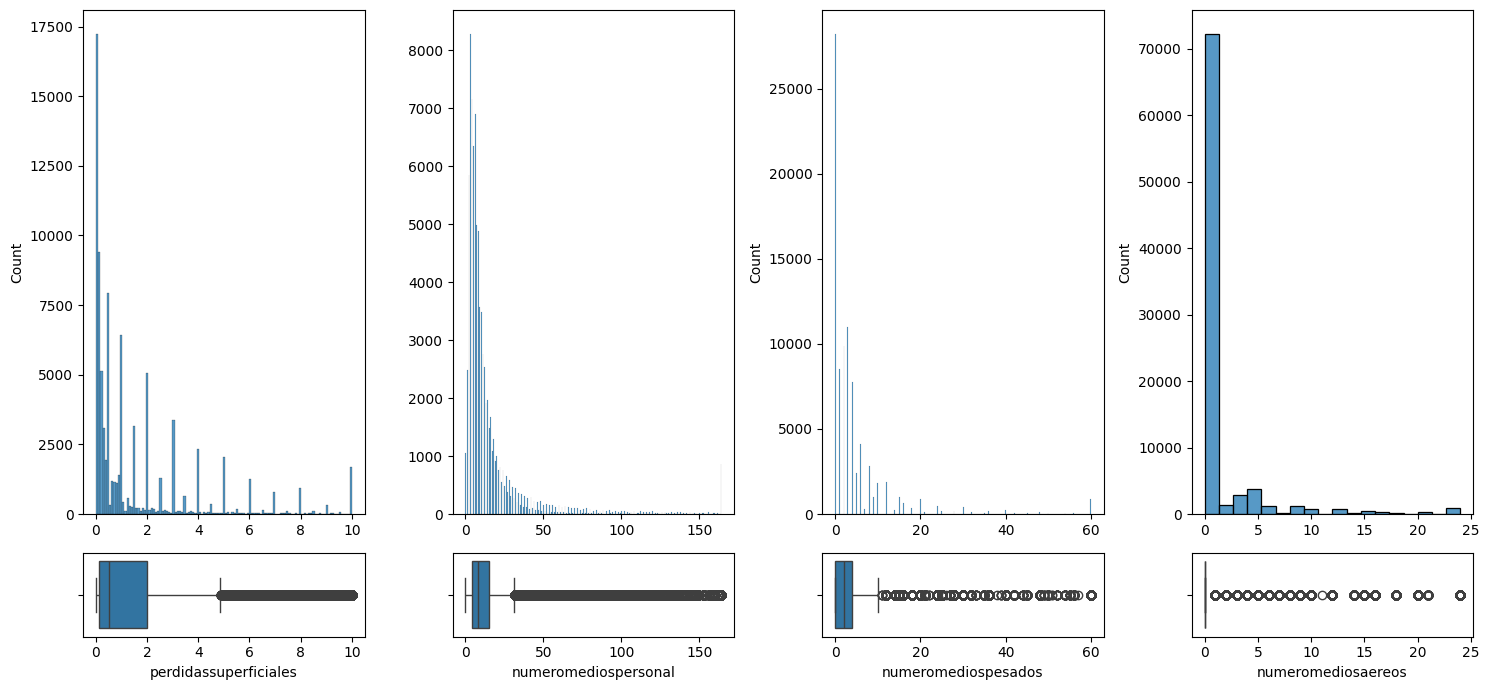

In [202]:
# Apply outlier clipping
for col in ['perdidassuperficiales', 'numeromediospersonal', 
            'numeromediospesados', 'numeromediosaereos']:
    incendios_cleaned[col] = incendios_cleaned[col].clip(upper=incendios_cleaned[col].quantile(0.99))

# Plot the histograms and boxplots
fig, axis = plt.subplots(2, 4, figsize=(15, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and boxplots
sns.histplot(ax=axis[0, 0], data=incendios_cleaned, x="perdidassuperficiales").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=incendios_cleaned, x="perdidassuperficiales")
sns.histplot(ax=axis[0, 1], data=incendios_cleaned, x="numeromediospersonal").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=incendios_cleaned, x="numeromediospersonal")
sns.histplot(ax=axis[0, 2], data=incendios_cleaned, x="numeromediospesados").set(xlabel=None)
sns.boxplot(ax=axis[1, 2], data=incendios_cleaned, x="numeromediospesados")
sns.histplot(ax=axis[0, 3], data=incendios_cleaned, x="numeromediosaereos").set(xlabel=None)
sns.boxplot(ax=axis[1, 3], data=incendios_cleaned, x="numeromediosaereos")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**3. Numerical - Categorical Analysis**

- Categorical Encoding for representation:

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables for analysis
numerical_vars = ['duracion', 'diasultimalluvia', 'tempmaxima', 'velocidadviento', 
                  'humrelativa', 'numeromediospersonal', 'nummunicipiosafectados',
                  'numeromediospesados', 'numeromediosaereos', 'perdidassuperficiales', 'altitud', 'latitud', 'longitud']

categorical_vars = ['direccionviento','tipodeataque','comunidad','idprovincia','provincia','deteccion','extinguido',
                    'horadeteccion','mesdeteccion','primeranotificaciondesde112','intencionalidad','claseincendio',
                    'lugar','combustible','tipodefuego','anio','iddetectadopor','idmunicipio']

---------------------------------------

In [204]:
print(incendios_cleaned.columns)

Index(['anio', 'probabilidadignicion', 'comunidad', 'idprovincia', 'provincia',
       'idmunicipio', 'latitud', 'longitud', 'altitud',
       'nummunicipiosafectados', 'deteccion', 'extinguido', 'horadeteccion',
       'mesdeteccion', 'duracion', 'primeranotificaciondesde112',
       'iddetectadopor', 'intencionalidad', 'diasultimalluvia', 'tempmaxima',
       'humrelativa', 'velocidadviento', 'direccionviento',
       'perdidassuperficiales', 'numeromediospersonal', 'numeromediospesados',
       'numeromediosaereos', 'claseincendio', 'lugar', 'combustible',
       'tipodefuego', 'tipodeataque'],
      dtype='object')


-------------------------------------------------------------------------

Encoding variables categóricas

In [205]:
# Step 1. Encoding categorical variables and save them in the dataset
for var in categorical_vars:
    incendios_cleaned[f"{var}_n"] = pd.factorize(incendios_cleaned[var])[0]

# Paso 2: Reemplazar variables originales
incendios_cleaned.drop(categorical_vars, axis=1, inplace=True)

# Save changes to the dataset
incendios_cleaned.to_csv("/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv", index=False)

--------------------------------------------------------------------------

In [206]:
print(incendios_cleaned.columns)

Index(['probabilidadignicion', 'latitud', 'longitud', 'altitud',
       'nummunicipiosafectados', 'duracion', 'diasultimalluvia', 'tempmaxima',
       'humrelativa', 'velocidadviento', 'perdidassuperficiales',
       'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos',
       'direccionviento_n', 'tipodeataque_n', 'comunidad_n', 'idprovincia_n',
       'provincia_n', 'deteccion_n', 'extinguido_n', 'horadeteccion_n',
       'mesdeteccion_n', 'primeranotificaciondesde112_n', 'intencionalidad_n',
       'claseincendio_n', 'lugar_n', 'combustible_n', 'tipodefuego_n',
       'anio_n', 'iddetectadopor_n', 'idmunicipio_n'],
      dtype='object')


--------------------------------------------------------------------------------------------

Escalado variables numéricas

In [207]:
from sklearn.preprocessing import RobustScaler

# Crear el Robust Scaler
scaler = RobustScaler()

# Ajustar y transformar los datos numéricos
incendios_cleaned[numerical_vars] = scaler.fit_transform(incendios_cleaned[numerical_vars])

# Cambiar el nombre de las variables numéricas escaladas
for var in numerical_vars:
    incendios_cleaned.rename(columns={var: var + '_r'}, inplace=True)





In [208]:
incendios_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86137 entries, 71837 to 584722
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   probabilidadignicion           86137 non-null  float64
 1   latitud_r                      86137 non-null  float64
 2   longitud_r                     86137 non-null  float64
 3   altitud_r                      86137 non-null  float64
 4   nummunicipiosafectados_r       86137 non-null  float64
 5   duracion_r                     86137 non-null  float64
 6   diasultimalluvia_r             86137 non-null  float64
 7   tempmaxima_r                   86137 non-null  float64
 8   humrelativa_r                  86137 non-null  float64
 9   velocidadviento_r              86137 non-null  float64
 10  perdidassuperficiales_r        86137 non-null  float64
 11  numeromediospersonal_r         86137 non-null  float64
 12  numeromediospesados_r          86137 non-null 

In [209]:
print(incendios_cleaned.columns)

Index(['probabilidadignicion', 'latitud_r', 'longitud_r', 'altitud_r',
       'nummunicipiosafectados_r', 'duracion_r', 'diasultimalluvia_r',
       'tempmaxima_r', 'humrelativa_r', 'velocidadviento_r',
       'perdidassuperficiales_r', 'numeromediospersonal_r',
       'numeromediospesados_r', 'numeromediosaereos_r', 'direccionviento_n',
       'tipodeataque_n', 'comunidad_n', 'idprovincia_n', 'provincia_n',
       'deteccion_n', 'extinguido_n', 'horadeteccion_n', 'mesdeteccion_n',
       'primeranotificaciondesde112_n', 'intencionalidad_n', 'claseincendio_n',
       'lugar_n', 'combustible_n', 'tipodefuego_n', 'anio_n',
       'iddetectadopor_n', 'idmunicipio_n'],
      dtype='object')


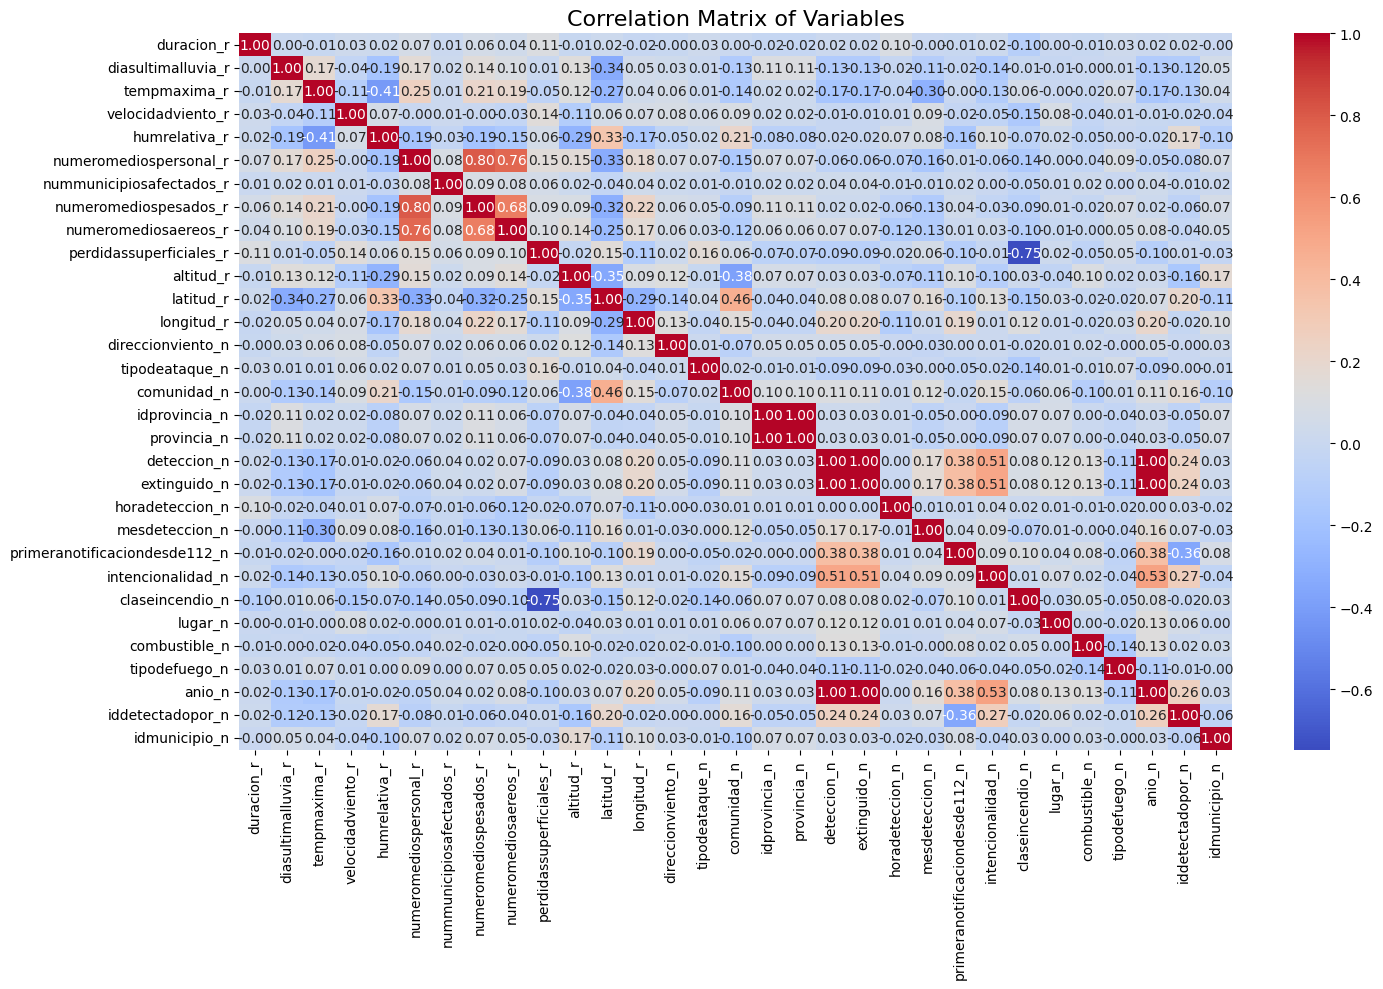

In [210]:
# Step 2: Select numerical and encoded categorical variables
analysis_vars = [f"{var}_r" for var in numerical_vars] + [f"{var}_n" for var in categorical_vars]

# Step 3: Compute correlation matrix
correlation_matrix = incendios_cleaned[analysis_vars].corr()

# Step 4: Plot heatmap
fig, axis = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title and adjust layout
axis.set_title("Correlation Matrix of Variables", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

ADRIAN 22/01/2025

----------------------------------------------------------------------------------------

In [211]:
incendios_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86137 entries, 71837 to 584722
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   probabilidadignicion           86137 non-null  float64
 1   latitud_r                      86137 non-null  float64
 2   longitud_r                     86137 non-null  float64
 3   altitud_r                      86137 non-null  float64
 4   nummunicipiosafectados_r       86137 non-null  float64
 5   duracion_r                     86137 non-null  float64
 6   diasultimalluvia_r             86137 non-null  float64
 7   tempmaxima_r                   86137 non-null  float64
 8   humrelativa_r                  86137 non-null  float64
 9   velocidadviento_r              86137 non-null  float64
 10  perdidassuperficiales_r        86137 non-null  float64
 11  numeromediospersonal_r         86137 non-null  float64
 12  numeromediospesados_r          86137 non-null 

In [212]:
incendios_cleaned.describe()

,probabilidadignicion,latitud_r,longitud_r,altitud_r,nummunicipiosafectados_r,duracion_r,diasultimalluvia_r,tempmaxima_r,humrelativa_r,velocidadviento_r,perdidassuperficiales_r,numeromediospersonal_r,numeromediospesados_r,numeromediosaereos_r,direccionviento_n,tipodeataque_n,comunidad_n,idprovincia_n,provincia_n,deteccion_n,extinguido_n,horadeteccion_n,mesdeteccion_n,primeranotificaciondesde112_n,intencionalidad_n,claseincendio_n,lugar_n,combustible_n,tipodefuego_n,anio_n,iddetectadopor_n,idmunicipio_n
count,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000,86137.0000
mean,34.8629,-0.2647,0.1460,0.1239,0.0046,0.1340,0.4308,0.0378,0.0385,0.2959,0.5506,0.6318,0.6400,1.2205,3.4176,0.0655,7.5851,18.7480,18.7480,3662.5216,3683.1708,1.2832,4.3739,0.1310,1.1933,0.6529,1.3954,3.5759,0.1291,16.1190,1.9435,130.1922
std,22.4862,0.8139,0.7521,0.6276,0.0708,0.7512,1.4688,0.7157,0.7014,1.0989,1.1774,2.1791,2.1822,3.6516,2.2640,0.3384,4.0341,10.2047,10.2047,2176.6728,2186.6044,0.7073,3.0607,0.3374,0.9673,0.4760,1.8688,2.1513,0.5179,7.8348,1.9620,84.6351
min,0.0000,-7.3267,-3.4628,-0.6833,0.0000,0.0000,-0.6364,-2.3000,-1.8214,-0.7692,-0.2632,-0.7273,-0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,20.0000,-0.6458,-0.3647,-0.3916,0.0000,0.0000,-0.3636,-0.5000,-0.4643,-0.3846,-0.2105,-0.3636,-0.5000,0.0000,2.0000,0.0000,3.0000,14.0000,14.0000,1739.0000,1748.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0000,9.0000,0.0000,57.0000
50%,30.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,9.0000,15.0000,15.0000,3692.0000,3718.0000,1.0000,4.0000,0.0000,1.0000,1.0000,1.0000,4.0000,0.0000,17.0000,1.0000,118.0000
75%,50.0000,0.3542,0.6353,0.6084,0.0000,0.0000,0.6364,0.5000,0.5357,0.6154,0.7895,0.6364,0.5000,0.0000,5.0000,0.0000,10.0000,22.0000,22.0000,5621.0000,5653.0000,2.0000,7.0000,0.0000,2.0000,1.0000,2.0000,4.0000,0.0000,23.0000,4.0000,203.0000
max,100.0000,0.5972,2.5055,2.5681,2.0000,153.0000,73.8182,6.8000,4.8214,17.6923,5.0000,14.1818,14.5000,24.0000,7.0000,2.0000,16.0000,49.0000,49.0000,7589.0000,7625.0000,3.0000,11.0000,1.0000,3.0000,1.0000,7.0000,14.0000,5.0000,29.0000,6.0000,450.0000



#Posibles outliers

nummunicipiosafectados: Hay valores superiores al Valores superiores a 1 (el percentil 75). Es probable que esta variable este relacionada con la duracion y las perdidas superficiales, voy a revisar si viene provocada por unos pocos registros y si sería interesante eliminarlos.

duracion: Valores mucho mayores a 14. Estos incendios de larga duración merecen una atención especial. Podrían indicar condiciones inusuales que dificultaron la extinción.

perdidas_superficiales: Valores significativamente mayores a 19. Estos incendios causaron pérdidas superficiales mucho mayores que la mayoría, lo que los convierte en posibles valores atípicos.

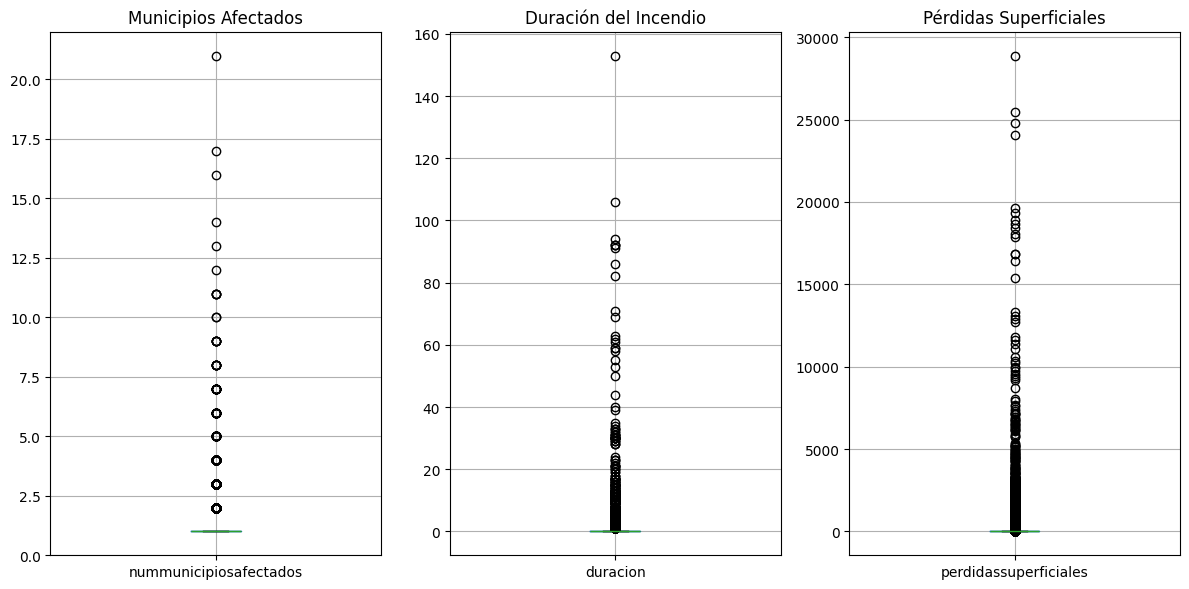

In [213]:
import matplotlib.pyplot as plt

# Diagramas de caja
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
incendios.boxplot(column='nummunicipiosafectados')
plt.title('Municipios Afectados')

plt.subplot(1, 3, 2)
incendios.boxplot(column='duracion')
plt.title('Duración del Incendio')

plt.subplot(1, 3, 3)
incendios.boxplot(column='perdidassuperficiales')
plt.title('Pérdidas Superficiales')

plt.tight_layout()
plt.show()




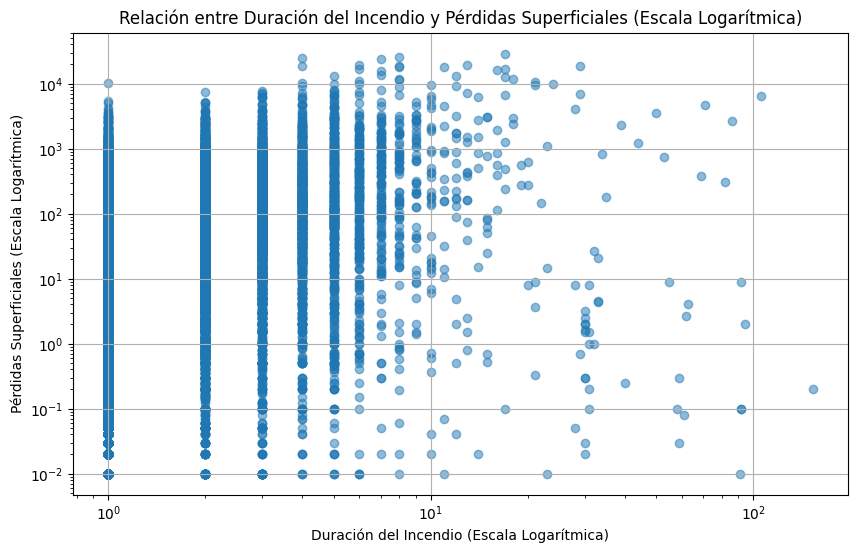

In [214]:
plt.figure(figsize=(10, 6))
plt.scatter(incendios['duracion'], incendios['perdidassuperficiales'], alpha=0.5)
plt.xlabel('Duración del Incendio (Escala Logarítmica)')
plt.ylabel('Pérdidas Superficiales (Escala Logarítmica)')
plt.title('Relación entre Duración del Incendio y Pérdidas Superficiales (Escala Logarítmica)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

Si bien parece obio que hay una relacion entre la duracion del incendio y las péridas superficiales, todavía no tengo muy claro si es necesario eliminar estos outliers

Ya hemos eliminado un buen número de registros desde el comienzo del proyecto, un 13.5% me parece un número demasiado elevado, voy a probar eliminando menos.

Siguen siendo demasiado altos, voy a aparcar por ahora este tema y pasar a los valores faltantes

EL MISMO EJERCICIO QUE ANTES, PERO PARA LA DURACIÓN

no entiendi porque me sale 0...tengo que investigar

VALORES FALTANTES

NO HAY FALTANTES!!

FEATURE ENGENEERING

Hablar del encoding
hacemos split antes o despues?
probamos el modelo en distintas fases? 
Eliminar outliers pérdidas superficiales?

DIVIDIMOS EL CONJUNTO DE DATOS

In [215]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    "numeromediospersonal_r",
    "numeromediospesados_r",
    "numeromediosaereos_r",
    "primeranotificaciondesde112_n",
    "anio_n",
    "extinguido_n"
]

# Eliminar las columnas del DataFrame
incendios_cleaned = incendios_cleaned.drop(columns=columnas_a_eliminar)

# Verificar que las columnas fueron eliminadas
print(incendios_cleaned.columns)



Index(['probabilidadignicion', 'latitud_r', 'longitud_r', 'altitud_r',
       'nummunicipiosafectados_r', 'duracion_r', 'diasultimalluvia_r',
       'tempmaxima_r', 'humrelativa_r', 'velocidadviento_r',
       'perdidassuperficiales_r', 'direccionviento_n', 'tipodeataque_n',
       'comunidad_n', 'idprovincia_n', 'provincia_n', 'deteccion_n',
       'horadeteccion_n', 'mesdeteccion_n', 'intencionalidad_n',
       'claseincendio_n', 'lugar_n', 'combustible_n', 'tipodefuego_n',
       'iddetectadopor_n', 'idmunicipio_n'],
      dtype='object')


In [216]:
# modelado
from sklearn.model_selection import train_test_split



# Dividimos el conjunto de datos en muestras de train y test
X = incendios_cleaned.drop("probabilidadignicion", axis = 1)
y = incendios_cleaned["probabilidadignicion"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


,latitud_r,longitud_r,altitud_r,nummunicipiosafectados_r,duracion_r,diasultimalluvia_r,tempmaxima_r,humrelativa_r,velocidadviento_r,perdidassuperficiales_r,direccionviento_n,tipodeataque_n,comunidad_n,idprovincia_n,provincia_n,deteccion_n,horadeteccion_n,mesdeteccion_n,intencionalidad_n,claseincendio_n,lugar_n,combustible_n,tipodefuego_n,iddetectadopor_n,idmunicipio_n
434427,0.0085,0.9162,0.3800,0.0000,0.0000,0.0000,-1.4000,-0.2143,-0.6154,-0.2105,2,0,9,13,13,4025,2,7,0,1,0,4,0,5,162
400443,-1.0581,-0.1868,1.1017,0.0000,1.0000,-0.5455,0.3000,-0.5714,-0.3846,1.5789,0,0,3,16,16,3268,2,1,1,0,7,6,0,1,344
555417,0.4008,-0.0185,-0.5298,0.0000,0.0000,-0.5455,0.3000,1.7143,-0.3846,-0.0526,6,0,10,14,14,6709,1,4,3,1,0,4,0,1,104
172831,-0.1683,0.7587,0.5720,0.0000,0.0000,-0.5455,-0.5000,1.3571,-0.4615,0.0000,0,0,6,10,10,911,2,8,1,1,0,4,0,0,23
165481,0.2345,0.2835,0.9559,0.0000,0.0000,0.2727,0.1000,1.2143,0.6923,-0.2105,0,0,11,17,17,656,0,3,1,1,0,1,1,2,23


Eliminada la variable coordenadas temporalmente por problemas con el escalado, no lo identifica como un númnero al ser 2 valores separados por una coma, revisar.

Tenemos el encoded para variables numericas y para las variables categóricas mas relevantes

Ahora mismo estamos haciendo un selectkbest sobre 14 variables numericas y 6 variables categóricas

Variables categóricas = cat_vars_1
Variables numéricas = num_vars_1
X_train_sel
X_test_sel

In [217]:
# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest, f_regression

In [218]:
 #Create the SelectKBest model with f_classif as the scoring function and k=5 to select the top 5 features
selection_model = SelectKBest(score_func=f_regression, k=6)

# Train the model on the training data
selection_model.fit(X_train, y_train)

# Get the indices of the selected features
selected_features = selection_model.get_support(indices=True)

# Print the names of the selected features from the original training data columns
print("Selected features:", X_train.columns[selected_features])

# Create DataFrames containing the selected features from the training and testing data
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[selected_features])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns[selected_features])

# Print the head of the selected features DataFrame for training data
print("X_train_sel.head:")
print(X_train_sel.head())
X_train_sel.head()

Selected features: Index(['latitud_r', 'longitud_r', 'altitud_r', 'tempmaxima_r', 'humrelativa_r',
       'deteccion_n'],
      dtype='object')
X_train_sel.head:
   latitud_r  longitud_r  altitud_r  tempmaxima_r  humrelativa_r  deteccion_n
0     0.0085      0.9162     0.3800       -1.4000        -0.2143    4025.0000
1    -1.0581     -0.1868     1.1017        0.3000        -0.5714    3268.0000
2     0.4008     -0.0185    -0.5298        0.3000         1.7143    6709.0000
3    -0.1683      0.7587     0.5720       -0.5000         1.3571     911.0000
4     0.2345      0.2835     0.9559        0.1000         1.2143     656.0000


,latitud_r,longitud_r,altitud_r,tempmaxima_r,humrelativa_r,deteccion_n
0,0.0085,0.9162,0.3800,-1.4000,-0.2143,4025.0000
1,-1.0581,-0.1868,1.1017,0.3000,-0.5714,3268.0000
2,0.4008,-0.0185,-0.5298,0.3000,1.7143,6709.0000
3,-0.1683,0.7587,0.5720,-0.5000,1.3571,911.0000
4,0.2345,0.2835,0.9559,0.1000,1.2143,656.0000


## Modelado

- Linear Regression

In [219]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred = lr_model.predict(X_train_sel)
y_test_pred = lr_model.predict(X_test_sel)

# Calculate evaluation metrics for train set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate evaluation metrics for test set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# Organizing the results
linear_regression_results = {
    "Train Set": {"R²": r2_train, "RMSE": rmse_train, "MAE": mae_train},
    "Test Set": {"R²": r2_test, "RMSE": rmse_test, "MAE": mae_test},
}

# Print results in a structured way
linear_regression_results

{'Train Set': {'R²': 0.41550602430195316,
  'RMSE': np.float64(17.1981544540112),
  'MAE': np.float64(13.300089733597089)},
 'Test Set': {'R²': 0.4113282526462234,
  'RMSE': np.float64(17.224151211062114),
  'MAE': np.float64(13.327628594060807)}}

- Lasso

In [220]:
# Import necessary library
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # Default alpha, can be tuned later
lasso_model.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred_lasso = lasso_model.predict(X_train_sel)
y_test_pred_lasso = lasso_model.predict(X_test_sel)

# Calculate evaluation metrics for train set
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)

# Calculate evaluation metrics for test set
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

# Organizing the results
lasso_results = {
    "Train Set": {"R²": r2_train_lasso, "RMSE": rmse_train_lasso, "MAE": mae_train_lasso},
    "Test Set": {"R²": r2_test_lasso, "RMSE": rmse_test_lasso, "MAE": mae_test_lasso},
}

# Print results in a structured way
lasso_results

{'Train Set': {'R²': 0.4073049489628059,
  'RMSE': np.float64(17.31838841681281),
  'MAE': np.float64(13.47377888774862)},
 'Test Set': {'R²': 0.40500989067886384,
  'RMSE': np.float64(17.31634007390717),
  'MAE': np.float64(13.455775366926229)}}

- Lasso tunning

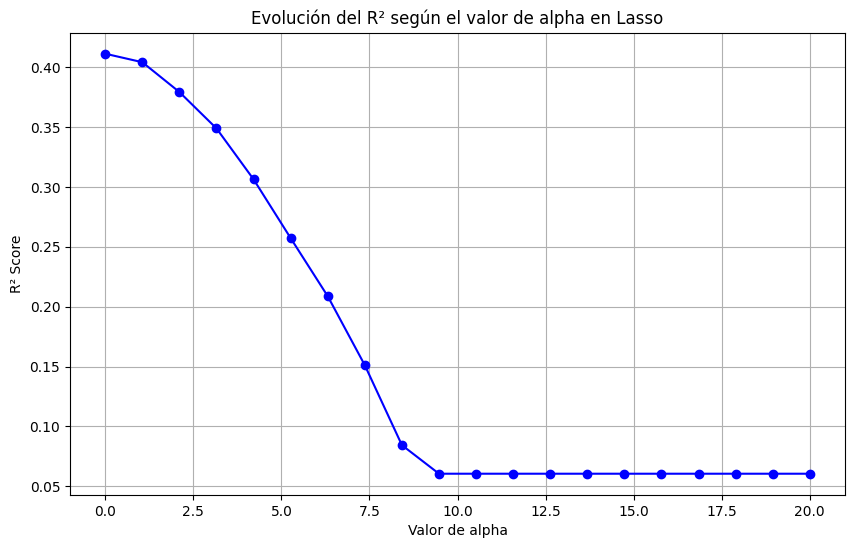

In [221]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Define a range of alpha values
alpha_values = np.linspace(0.0001, 20.0, 20)

# Store R² scores
r2_scores = []

# Train a Lasso model for each alpha value
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_sel, y_train)
    y_test_pred = lasso_model.predict(X_test_sel)
    r2_scores.append(r2_score(y_test, y_test_pred))

# Plot the R² score evolution
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, r2_scores, marker='o', linestyle='-', color='b')
plt.title('Evolución del R² según el valor de alpha en Lasso')
plt.xlabel('Valor de alpha')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()


- Random Forest

In [222]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred_rf = rf_model.predict(X_train_sel)
y_test_pred_rf = rf_model.predict(X_test_sel)

# Calculate evaluation metrics for train set
r2_train_rf = r2_score(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)

# Calculate evaluation metrics for test set
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Organizing the results
random_forest_results = {
    "Train Set": {"R²": r2_train_rf, "RMSE": rmse_train_rf, "MAE": mae_train_rf},
    "Test Set": {"R²": r2_test_rf, "RMSE": rmse_test_rf, "MAE": mae_test_rf},
}

# Print results in a structured way
random_forest_results


{'Train Set': {'R²': 0.9694679913686962,
  'RMSE': np.float64(3.930696513770096),
  'MAE': np.float64(2.2079203545091173)},
 'Test Set': {'R²': 0.7895625728842649,
  'RMSE': np.float64(10.298233263970905),
  'MAE': np.float64(5.844747917876123)}}

- XGBOOST

In [223]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred_xgb = xgb_model.predict(X_train_sel)
y_test_pred_xgb = xgb_model.predict(X_test_sel)

# Calculate evaluation metrics for train set
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)

# Calculate evaluation metrics for test set
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

# Organizing the results
xgboost_results = {
    "Train Set": {"R²": r2_train_xgb, "RMSE": rmse_train_xgb, "MAE": mae_train_xgb},
    "Test Set": {"R²": r2_test_xgb, "RMSE": rmse_test_xgb, "MAE": mae_test_xgb},
}

# Print results in a structured way
xgboost_results


{'Train Set': {'R²': 0.8269776911816882,
  'RMSE': np.float64(9.357134601225404),
  'MAE': np.float64(6.2525438012940855)},
 'Test Set': {'R²': 0.7710744004628509,
  'RMSE': np.float64(10.741091425707953),
  'MAE': np.float64(7.001773058894877)}}

- GRIDSEARCH

In [224]:
"""

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    "n_estimators": [100, 300, 500],  # Number of boosting rounds
    "learning_rate": [0.01, 0.05, 0.1],  # Lower values prevent overfitting
    "max_depth": [3, 5, 7],  # Limit tree depth
    "min_child_weight": [1, 3, 5],  # Higher values prevent overfitting
    "subsample": [0.7, 0.8, 1.0],  # % of samples used per tree
    "colsample_bytree": [0.7, 0.8, 1.0],  # % of features used per tree
    "reg_alpha": [0, 0.01, 0.1],  # L1 Regularization
    "reg_lambda": [0.1, 1.0, 10.0]  # L2 Regularization
}

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Grid search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring="r2", verbose=1, n_jobs=-1)
grid_search.fit(X_train_sel, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_xgb = xgb.XGBRegressor(**grid_search.best_params_, objective="reg:squarederror", random_state=42)
best_xgb.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred_best = best_xgb.predict(X_train_sel)
y_test_pred_best = best_xgb.predict(X_test_sel)

# Calculate evaluation metrics
r2_train_best = r2_score(y_train, y_train_pred_best)
rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
mae_train_best = mean_absolute_error(y_train, y_train_pred_best)

r2_test_best = r2_score(y_test, y_test_pred_best)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
mae_test_best = mean_absolute_error(y_test, y_test_pred_best)

# Print results
xgboost_optimized_results = {
    "Train Set": {"R²": r2_train_best, "RMSE": rmse_train_best, "MAE": mae_train_best},
    "Test Set": {"R²": r2_test_best, "RMSE": rmse_test_best, "MAE": mae_test_best},
}

xgboost_optimized_results """


'\n\nfrom sklearn.model_selection import GridSearchCV\nimport xgboost as xgb\n\n# Define parameter grid\nparam_grid = {\n    "n_estimators": [100, 300, 500],  # Number of boosting rounds\n    "learning_rate": [0.01, 0.05, 0.1],  # Lower values prevent overfitting\n    "max_depth": [3, 5, 7],  # Limit tree depth\n    "min_child_weight": [1, 3, 5],  # Higher values prevent overfitting\n    "subsample": [0.7, 0.8, 1.0],  # % of samples used per tree\n    "colsample_bytree": [0.7, 0.8, 1.0],  # % of features used per tree\n    "reg_alpha": [0, 0.01, 0.1],  # L1 Regularization\n    "reg_lambda": [0.1, 1.0, 10.0]  # L2 Regularization\n}\n\n# Initialize XGBoost regressor\nxgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)\n\n# Grid search\ngrid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring="r2", verbose=1, n_jobs=-1)\ngrid_search.fit(X_train_sel, y_train)\n\n# Best parameters\nprint("Best Parameters:", grid_search.best_params_)\n\n# Train best model\nbest

- LightGBM Model

In [225]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

# Train the model
lgb_model.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred_lgb = lgb_model.predict(X_train_sel)
y_test_pred_lgb = lgb_model.predict(X_test_sel)

# Calculate evaluation metrics
r2_train_lgb = r2_score(y_train, y_train_pred_lgb)
rmse_train_lgb = np.sqrt(mean_squared_error(y_train, y_train_pred_lgb))
mae_train_lgb = mean_absolute_error(y_train, y_train_pred_lgb)

r2_test_lgb = r2_score(y_test, y_test_pred_lgb)
rmse_test_lgb = np.sqrt(mean_squared_error(y_test, y_test_pred_lgb))
mae_test_lgb = mean_absolute_error(y_test, y_test_pred_lgb)

# Organizing the results
lightgbm_results = {
    "Train Set": {"R²": r2_train_lgb, "RMSE": rmse_train_lgb, "MAE": mae_train_lgb},
    "Test Set": {"R²": r2_test_lgb, "RMSE": rmse_test_lgb, "MAE": mae_test_lgb},
}

# Print results in a structured way
lightgbm_results


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 6
[LightGBM] [Info] Start training from score 34.865170


{'Train Set': {'R²': 0.7694838577392402,
  'RMSE': np.float64(10.800466067211572),
  'MAE': np.float64(7.287413829572449)},
 'Test Set': {'R²': 0.7500521454359427,
  'RMSE': np.float64(11.22343872252231),
  'MAE': np.float64(7.508708417798391)}}

- NEURONAL NETWORK

In [226]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_sel.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = nn_model.fit(
    X_train_sel, y_train,
    validation_data=(X_test_sel, y_test),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Predictions on train and test sets
y_train_pred_nn = nn_model.predict(X_train_sel).flatten()
y_test_pred_nn = nn_model.predict(X_test_sel).flatten()

# Calculate evaluation metrics
r2_train_nn = r2_score(y_train, y_train_pred_nn)
rmse_train_nn = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
mae_train_nn = mean_absolute_error(y_train, y_train_pred_nn)

r2_test_nn = r2_score(y_test, y_test_pred_nn)
rmse_test_nn = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
mae_test_nn = mean_absolute_error(y_test, y_test_pred_nn)

# Organizing the results
nn_results = {
    "Train Set": {"R²": r2_train_nn, "RMSE": rmse_train_nn, "MAE": mae_train_nn},
    "Test Set": {"R²": r2_test_nn, "RMSE": rmse_test_nn, "MAE": mae_test_nn},
}

# Print results in a structured way
nn_results


Epoch 1/200


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2154/2154 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 593.1024 - val_loss: 510.2458
Epoch 2/200
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 456.8085 - val_loss: 462.4161
Epoch 3/200
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 450.2775 - val_loss: 456.5623
Epoch 4/200
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 422.5230 - val_loss: 437.9789
Epoch 5/200
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 366.1500 - val_loss: 393.1745
Epoch 6/200
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 349.8654 - val_loss: 424.5737
Epoch 7/200
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 350.6714 - val_loss: 570.1467
Epoch 8/200
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 342.6948 - val_loss: 543.2548
Epoch 9/200
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 352.2994 - val_loss: 394.0421
Epoch 10/200
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 341.0813 - val_loss: 390.6041
Epoch 11/200
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 340.6732 - val_lo

{'Train Set': {'R²': -7.458894819073292,
  'RMSE': np.float64(65.42573913811432),
  'MAE': np.float64(13.919093536888452)},
 'Test Set': {'R²': 0.3957919750999447,
  'RMSE': np.float64(17.449961682978255),
  'MAE': np.float64(13.531426079095532)}}

- ALL MODELS SUMMARY

In [227]:
import pandas as pd

# Collecting results from all models
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Random Forest", "XGBoost", "LightGBM", "Neural Network"],
    
    # Train metrics
    "Train R²": [
        linear_regression_results["Train Set"]["R²"],
        lasso_results["Train Set"]["R²"],
        random_forest_results["Train Set"]["R²"],
        xgboost_results["Train Set"]["R²"],
        lightgbm_results["Train Set"]["R²"],
        nn_results["Train Set"]["R²"]
    ],
    "Train RMSE": [
        linear_regression_results["Train Set"]["RMSE"],
        lasso_results["Train Set"]["RMSE"],
        random_forest_results["Train Set"]["RMSE"],
        xgboost_results["Train Set"]["RMSE"],
        lightgbm_results["Train Set"]["RMSE"],
        nn_results["Train Set"]["RMSE"]
    ],
    "Train MAE": [
        linear_regression_results["Train Set"]["MAE"],
        lasso_results["Train Set"]["MAE"],
        random_forest_results["Train Set"]["MAE"],
        xgboost_results["Train Set"]["MAE"],
        lightgbm_results["Train Set"]["MAE"],
        nn_results["Train Set"]["MAE"]
    ],
    
    # Test metrics
    "Test R²": [
        linear_regression_results["Test Set"]["R²"],
        lasso_results["Test Set"]["R²"],
        random_forest_results["Test Set"]["R²"],
        xgboost_results["Test Set"]["R²"],
        lightgbm_results["Test Set"]["R²"],
        nn_results["Test Set"]["R²"]
    ],
    "Test RMSE": [
        linear_regression_results["Test Set"]["RMSE"],
        lasso_results["Test Set"]["RMSE"],
        random_forest_results["Test Set"]["RMSE"],
        xgboost_results["Test Set"]["RMSE"],
        lightgbm_results["Test Set"]["RMSE"],
        nn_results["Test Set"]["RMSE"]
    ],
    "Test MAE": [
        linear_regression_results["Test Set"]["MAE"],
        lasso_results["Test Set"]["MAE"],
        random_forest_results["Test Set"]["MAE"],
        xgboost_results["Test Set"]["MAE"],
        lightgbm_results["Test Set"]["MAE"],
        nn_results["Test Set"]["MAE"]
    ]
})

# Formatting the table for better readability
pd.set_option("display.float_format", "{:.4f}".format)  # Limit decimals for clarity

# Display the final comparison table
model_comparison

,Model,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
0,Linear Regression,0.4155,17.1982,13.3001,0.4113,17.2242,13.3276
1,Lasso,0.4073,17.3184,13.4738,0.4050,17.3163,13.4558
2,Random Forest,0.9695,3.9307,2.2079,0.7896,10.2982,5.8447
3,XGBoost,0.8270,9.3571,6.2525,0.7711,10.7411,7.0018
4,LightGBM,0.7695,10.8005,7.2874,0.7501,11.2234,7.5087
5,Neural Network,-7.4589,65.4257,13.9191,0.3958,17.4500,13.5314


-------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

DON'T RUN NEXT CODE - ONLY FOR PRESENTARTION

-----------------------------------------------------------------------------------------------------

# FINAL TEST

In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the range of K values to test
k_values = [10, 20, 30, 32]  # You can modify this list to test different feature numbers

# Dictionary to store results for each K value
k_results = {}

# Loop through different K values
for k in k_values:
    print(f"\n🔹 Running models for K = {k} features...")

    # Feature Selection
    selection_model = SelectKBest(score_func=f_regression, k=k)
    selection_model.fit(X_train, y_train)
    selected_features = selection_model.get_support(indices=True)
    
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[selected_features])
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns[selected_features])

    # Dictionary to store results for this specific K
    model_results = {}

    # --- Linear Regression ---
    lr_model = LinearRegression()
    lr_model.fit(X_train_sel, y_train)
    y_train_pred = lr_model.predict(X_train_sel)
    y_test_pred = lr_model.predict(X_test_sel)
    model_results["Linear Regression"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # --- Lasso ---
    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(X_train_sel, y_train)
    y_train_pred = lasso_model.predict(X_train_sel)
    y_test_pred = lasso_model.predict(X_test_sel)
    model_results["Lasso"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # --- Random Forest ---
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_sel, y_train)
    y_train_pred = rf_model.predict(X_train_sel)
    y_test_pred = rf_model.predict(X_test_sel)
    model_results["Random Forest"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # --- XGBoost ---
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    xgb_model.fit(X_train_sel, y_train)
    y_train_pred = xgb_model.predict(X_train_sel)
    y_test_pred = xgb_model.predict(X_test_sel)
    model_results["XGBoost"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # --- LightGBM ---
    lgb_model = lgb.LGBMRegressor(random_state=42)
    lgb_model.fit(X_train_sel, y_train)
    y_train_pred = lgb_model.predict(X_train_sel)
    y_test_pred = lgb_model.predict(X_test_sel)
    model_results["LightGBM"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # --- Neural Network ---
    nn_model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_sel.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    nn_model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")
    nn_model.fit(X_train_sel, y_train, epochs=100, verbose=0, validation_data=(X_test_sel, y_test))

    y_train_pred = nn_model.predict(X_train_sel).flatten()
    y_test_pred = nn_model.predict(X_test_sel).flatten()
    model_results["Neural Network"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # Save results for this K
    k_results[k] = model_results

# Convert results into a DataFrame for visualization
comparison_dfs = {k: pd.DataFrame.from_dict(k_results[k], orient="index") for k in k_values}

# Display results for each K
for k, df in comparison_dfs.items():
    print(f"\n📊 Model Comparison for K = {k} features:")
    display(df)



🔹 Running models for K = 10 features...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 10
[LightGBM] [Info] Start training from score 1.543539


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2154/2154 ━━━━━━━━━━━━━━━━━━━━ 2s 757us/step
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step

🔹 Running models for K = 20 features...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1251
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 20
[LightGBM] [Info] Start training from score 1.543539


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2154/2154 ━━━━━━━━━━━━━━━━━━━━ 2s 765us/step
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step

🔹 Running models for K = 30 features...


/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=30 is greater than n_features=29. All the features will be returned.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 29
[LightGBM] [Info] Start training from score 1.543539


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2154/2154 ━━━━━━━━━━━━━━━━━━━━ 2s 739us/step
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step

🔹 Running models for K = 32 features...


/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=32 is greater than n_features=29. All the features will be returned.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 29
[LightGBM] [Info] Start training from score 1.543539


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2154/2154 ━━━━━━━━━━━━━━━━━━━━ 2s 736us/step
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step

📊 Model Comparison for K = 10 features:


,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
Linear Regression,0.5685,1.4656,0.8631,0.5536,1.5100,0.8653
Lasso,0.5523,1.4928,0.8837,0.5573,1.5038,0.8848
Random Forest,0.9161,0.6462,0.3534,0.5384,1.5356,0.8689
XGBoost,0.6523,1.3157,0.7679,0.5772,1.4695,0.8459
LightGBM,0.6142,1.3858,0.8141,0.5854,1.4553,0.8457
Neural Network,-0.0000,2.2312,1.6083,-0.0000,2.2601,1.6291



📊 Model Comparison for K = 20 features:


,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
Linear Regression,0.5707,1.4619,0.8601,0.5560,1.5060,0.8618
Lasso,0.5534,1.4910,0.8798,0.5587,1.5014,0.8809
Random Forest,0.9350,0.5689,0.3145,0.5778,1.4685,0.8257
XGBoost,0.6910,1.2402,0.7072,0.5944,1.4394,0.8111
LightGBM,0.6443,1.3307,0.7675,0.6043,1.4218,0.8085
Neural Network,-0.0000,2.2312,1.6083,-0.0000,2.2601,1.6291



📊 Model Comparison for K = 30 features:


,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
Linear Regression,0.5711,1.4612,0.8606,0.5549,1.5078,0.8634
Lasso,0.5535,1.4909,0.8797,0.5585,1.5017,0.8810
Random Forest,0.9426,0.5344,0.3011,0.5986,1.4319,0.8127
XGBoost,0.7148,1.1915,0.6818,0.6030,1.4240,0.8028
LightGBM,0.6587,1.3035,0.7546,0.6122,1.4075,0.8020
Neural Network,0.0116,2.2181,1.6124,0.0115,2.2471,1.6325



📊 Model Comparison for K = 32 features:


,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
Linear Regression,0.5711,1.4612,0.8606,0.5549,1.5078,0.8634
Lasso,0.5535,1.4909,0.8797,0.5585,1.5017,0.8810
Random Forest,0.9426,0.5344,0.3011,0.5986,1.4319,0.8127
XGBoost,0.7148,1.1915,0.6818,0.6030,1.4240,0.8028
LightGBM,0.6587,1.3035,0.7546,0.6122,1.4075,0.8020
Neural Network,0.0002,2.2310,1.6082,-0.0000,2.2601,1.6291


------------------------------------------------------------------------------------------------------------------